## 과제 9. 동전관리시스템의 OOP 구현
### 20180594 이정훈

### Data Writing

In [1]:
if __name__ == '__main__' :
    fp = open('purse-input.txt', 'wt', encoding = 'utf-8')
    fp.write('서강일, 500, 100, 10, 50, 500, 100, 100\n')
    fp.write('서강이, 500, 50, 50, 100, 100, 10\n' )
    fp.write('서강삼, 100, 100, 100, 10\n')
    fp.write('서강사, 500, 500, 500, 50, 50, 50, 100\n')
    fp.write('서강오, 500, 100, 100, 500, 100, 10, 10, 1\n')
    fp.write('서강육, 100, 50, 100, 50, 100, 100, 500\n')
    fp.write('서강칠, 50, 500, 500, 100, 100\n')
    fp.write('서강팔, 500, 500,500, 50, 100, 100\n')
    fp.close()

<span style="font-size:120%">
    File Writing을 통해 초기 데이터를 준비해 줍니다
    
## Probelm
    
    아래와 같은 입력에 대해, 지갑 안의 동전들을 관리하는 시스템을 다음 조건을 만족하면서 추가적인 기능을 갖도록 객체지향프로그래밍으로 설계하시오.
    
    ☞ 조건
    
- 입력은 purse-input.txt 파일에서 읽어 오시오. <br>
    
    
- 두 개의 클래스, Purse, PurseMgtSystem을 각각 다른 파일에서 만들어 해결하시오. <br>
    
    
- 주어진 동전 정보를 활용하여 Purse 객체를 만들고, 이 객체를 PurseMgtSystem 클래스에서 입력 받아 전체 지갑들을 처리하시오. <br>
    
    
- class의 각 속성은 밑줄 하나로 시작하게 하여 즉, 보호 모드로서 @property를 이용하시오. _num, _name, _coins <br>
    
    
- Purse class 객체는 PurseMgtSystem 클래스의 register_purse 메서드로 PurseMgtSystem에 등록시키고, 모든 지갑들의 객체가 등록되면 PurseMgtSystem의 정보처리 process 메서드를 호출해서 보유자들의 순위를 구하시오. 이때, 동순위인 경우 같은 등수로 처리하시오. <br>
    
    
- 동전을 입력 받아서 그 동전의 최다 보유자를 출력하시오. 이때, 여러 명인 경우, 해당 보유자들 모두 출력하시오 <br>
    

- 이 프로그램의 실행시간을 decorator를 사용해서 구하시오. <br>
    
    
- 입력에 500, 100, 50, 10, 1 이외의 숫자데이터가 있는 경우는 아래 메시지를 출력하고 종료하시오. <br>
    
    
>잘못된 동전 데이터가 있습니다.
>동전관리시스템이 비정상 종료합니다.

    
    위 조건외에 추가적인 기능을 갖도록 확장해서 구현하시오.

## Purse Class

In [2]:
%%writefile Purse.py
class Purse(object) :
    def __init__(self) :
        self._num = 0
        self._names = ''
        self._coins = 0
        
    @property
    def num(self) :
        return self._num
    
    @num.setter
    def num(self, value) :
        self._num = int(value)
    
    @property
    def name(self) :
        return self._names
    
    @name.setter
    def name(self, value) :
        self._name = value
    
    @property
    def coins(self) :
        return self._coins
    
    @coins.setter
    def coins(self, value) :
        value = list(map(int, value))
        self._coins = value

Overwriting Purse.py


<span style="font-size:120%">
    Class를 만들어 준 뒤 파일로 따로 저장해 줍니다

In [3]:
%run Purse.py

### Processing Part

<br>
<span style="font-size:120%">

* CheckTime 함수로 실행 시간을 구해 줍니다 <br>
    
    
* CoinError Class를 통해 예외 처리를 해 줍니다<br>
    
    
* PurseMgtSystem Class를 통해 실질적인 계산을 돌려 줍니다.
    
    * Data는 미리 입력했던 purse-input.txt를 통해서 Purse class를 통해 instance 해 줍니다.
    
    * register_purse 함수를 통해 Class 내의 자유변수로 저장해 줍니다. 범용성을 위해 for문을 이용하여 데이터를 입력한 뒤 휘발되게 하여, 데이터를 수정한 뒤 얼마든지 재사용이 가능토록 하였습니다.
    
    * 저장된 정보는 process 함수를 통해 관계형 데이터 형태로 변환해 줍니다. 이 때, 입력받은 동전의 정보를 count하여 저장합니다. 모든 변환이 완료되면 새로운 column인 rank를 추가하여 순위를 계산해 줍니다.
    
    * print_rank 함수를 통해 입력받은 동전이 가장 많은 사람의 정보를 출력해 줍니다. 이 때, 지정된 동전의 형태가 아닌 다른 동전이 입력되면 CoinError를 raise 하여 프로그램을 종료시킵니다.
    
    * plot_coins는 개인적으로 추가한 함수입니다. matplotlib.pyplot을 이용하여 각 사람당 가진 금액을 plotting해 줍니다.
    
    * distplot 함수는 가진 금액에 대해서 분포를 알 수 있습니다.
    
    * histplot은 Rank를 기준으로 입력한 동전을 얼마나 많이 소지하고 있는지 보여줍니다.
    
    
    
* runProgram 함수는 그간의 모든 python 코드들을 실행시키는 함수입니다. Decorator를 이용해 Checktime을 불러 코드의 총 실행시간을 출력해 줍니다.

In [4]:
import time
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

def checkTime(func): 
    def intime():
        t0 = time.time()
        func()
        t1 = time.time()
        print("실행시간은 : %.20f 초" %(t1 - t0))
        
    return intime

info = []
with open('purse-input.txt', 'rt') as fp :
    num = 0
    for i in fp :
        num += 1
        x, y = i.replace('\n', '').replace(' ','').split(',', maxsplit = 1)
        y = y.split(',')
        y = list(map(int, y))
        temp = (num, x, y)
        info.append(temp)
        
class CoinError(Exception) :
    def __init__(self, msg) :
        self._massage = msg

class PurseMgtSystem(Purse) :
    def __init__(self) :
        Purse.__init__(self)
        self._P = Purse()
        self._sum = 0
        self._rank = 0
        self._data = []
        self._df = pd.DataFrame()
        self._enteredcoin = 0
    
    def register_purse(self) :
        for i in range(len(info)) :
            self._P.num, self._P.name, self._P.coins = info[i][0], info[i][1], info[i][2]
            for i in self._P.coins :
                if i not in [1, 10, 50, 100, 500] : 
                    raise CoinError('잘못된 동전 데이터가 있습니다. \n동전관리시스템이 비정상 종료합니다.\n')
            self._data.append((self._P.num, self._P.name, self._P.coins))

    def process(self) :
        for i in range(len(self._data)) :
            temp = pd.DataFrame({'name' : self._data[i][1],
                                 500 : self._data[i][2].count(500), 
                                 100 : self._data[i][2].count(100), 
                                 50 : self._data[i][2].count(50), 
                                 10 : self._data[i][2].count(10), 
                                 1 : self._data[i][2].count(1),
                                 'sum' : sum(self._data[i][2])},
                                 index = [self._data[i][0]])
            self._df = pd.concat([self._df, temp], axis = 0)
            
        self._df['rank'] = self._df['sum'].rank(method = 'min', ascending = False).astype('int')
        self._df = self._df.sort_values('rank')
        
        for i in range(len(self._df.index)) :
            num = self._df.index[i]
            name = self._df['name'][num]
            count = self._df.iloc[i,1:6].astype('int')
            summed = self._df['sum'][num]
            rank = self._df['rank'][num]
            print('번호 : %d 이름 : %s 500원 : %d 100원 : %d 50원 : %d 10원 : %d 1원 : %d 총액 : %5d 순위 : %d' 
                  %(num, name, count[500], count[100], count[50], count[10], count[1], summed, rank))
        print('')
        
    def print_rank(self) :
        coin = int(input('동전 : '))
        if coin not in [1, 10, 50, 100, 500] : 
            raise CoinError('잘못된 동전 데이터가 있습니다. \n동전관리시스템이 비정상 종료합니다.\n')
        
        print('최다 보유자들')
        find = self._df[self._df[coin] == self._df[coin].max()]
        for k in find.index :
            print('번호 : %d 이름 : %s 개수 : %d' %(k, find['name'][k], find[coin][k]))
        self._enteredcoin = coin
        print()
            
    def plot_coins(self) :
        sns.set_theme(style = "white", palette = "pastel")
        plt.figure(figsize = (8,6))
        sns.barplot(x = self._df.index, y = self._df['sum'])
        plt.xlabel('Index', fontsize = 15, fontfamily = 'Serif')
        plt.ylabel('Money Owned', fontsize = 15, fontfamily = 'Serif')
        plt.title('Money Information', fontsize = 20, fontweight = 'bold', fontfamily = 'Serif')
        plt.show()
        
    def distplot(self) :
        sns.set_theme(style = "white", palette = "pastel")
        sns.displot(data = self._df['sum'], kde = True, height = 6, aspect = 1.3)
        plt.title('Distribution', fontsize = 20, fontweight = 'bold', fontfamily = 'Serif')
        plt.xlabel('Money Owned', fontsize = 15, fontfamily = 'Serif')
        plt.ylabel('Frequency', fontsize = 15, fontfamily = 'Serif')
        plt.show()
        
    def histplot(self) :
        sns.displot(data = self._df['sum'], x = self._df['rank'], 
                    y = self._df[self._enteredcoin], kind = 'hist', cbar = True, height = 6, aspect = 1.3)
        plt.title('Who is owning entered coins?', fontsize = 20, fontweight = 'bold', fontfamily = 'Serif')
        plt.xlabel('Rank', fontsize = 15, fontfamily = 'Serif')
        plt.ylabel('%d' %self._enteredcoin, fontsize = 15, fontfamily = 'Serif')
        plt.show()
    
@checkTime
def runProgram() : 
    data = PurseMgtSystem()
    try : 
        data.register_purse()
        data.process()
        try : 
            data.print_rank() 
            data.plot_coins()
            data.distplot()
            data.histplot()
        except CoinError as e : print(e.args[0])
    except CoinError as e : print(e.args[0])

In [5]:
if __name__ == '__main__' : runProgram()

번호 : 4 이름 :  500원 : 3 100원 : 1 50원 : 3 10원 : 0 1원 : 0 총액 :  1750 순위 : 1
번호 : 8 이름 :  500원 : 3 100원 : 2 50원 : 1 10원 : 0 1원 : 0 총액 :  1750 순위 : 1
번호 : 1 이름 :  500원 : 2 100원 : 3 50원 : 1 10원 : 1 1원 : 0 총액 :  1360 순위 : 3
번호 : 5 이름 :  500원 : 2 100원 : 3 50원 : 0 10원 : 2 1원 : 1 총액 :  1321 순위 : 4
번호 : 7 이름 :  500원 : 2 100원 : 2 50원 : 1 10원 : 0 1원 : 0 총액 :  1250 순위 : 5
번호 : 6 이름 :  500원 : 1 100원 : 4 50원 : 2 10원 : 0 1원 : 0 총액 :  1000 순위 : 6
번호 : 2 이름 :  500원 : 1 100원 : 2 50원 : 2 10원 : 1 1원 : 0 총액 :   810 순위 : 7
번호 : 3 이름 :  500원 : 0 100원 : 3 50원 : 0 10원 : 1 1원 : 0 총액 :   310 순위 : 8

동전 : 4
잘못된 동전 데이터가 있습니다. 
동전관리시스템이 비정상 종료합니다.

실행시간은 : 3.88973593711853027344 초


<span style="font-size:120%">
    '1,10,50,100,500'원이 아니라면, 위와같이 예외 처리를 해 줍니다.

번호 : 4 이름 :  500원 : 3 100원 : 1 50원 : 3 10원 : 0 1원 : 0 총액 :  1750 순위 : 1
번호 : 8 이름 :  500원 : 3 100원 : 2 50원 : 1 10원 : 0 1원 : 0 총액 :  1750 순위 : 1
번호 : 1 이름 :  500원 : 2 100원 : 3 50원 : 1 10원 : 1 1원 : 0 총액 :  1360 순위 : 3
번호 : 5 이름 :  500원 : 2 100원 : 3 50원 : 0 10원 : 2 1원 : 1 총액 :  1321 순위 : 4
번호 : 7 이름 :  500원 : 2 100원 : 2 50원 : 1 10원 : 0 1원 : 0 총액 :  1250 순위 : 5
번호 : 6 이름 :  500원 : 1 100원 : 4 50원 : 2 10원 : 0 1원 : 0 총액 :  1000 순위 : 6
번호 : 2 이름 :  500원 : 1 100원 : 2 50원 : 2 10원 : 1 1원 : 0 총액 :   810 순위 : 7
번호 : 3 이름 :  500원 : 0 100원 : 3 50원 : 0 10원 : 1 1원 : 0 총액 :   310 순위 : 8

동전 : 500
최다 보유자들
번호 : 4 이름 :  개수 : 3
번호 : 8 이름 :  개수 : 3



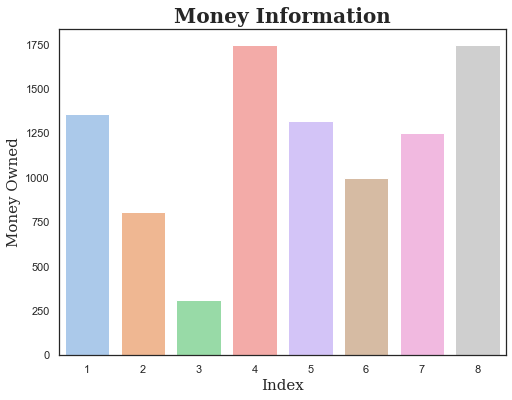

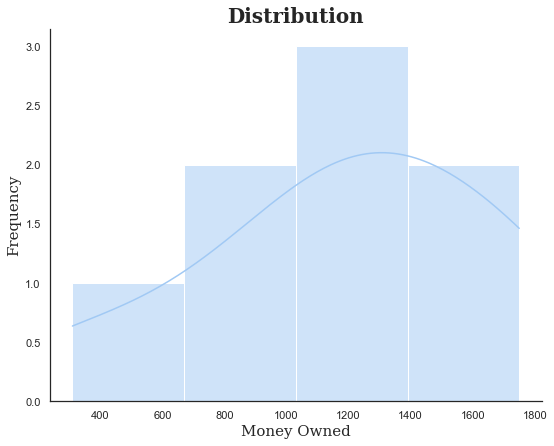

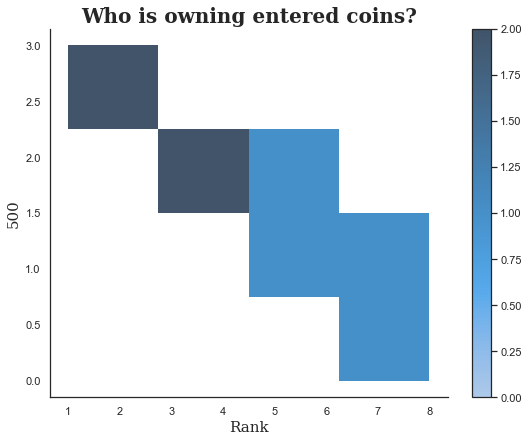

실행시간은 : 3.56891512870788574219 초


In [6]:
if __name__ == '__main__' : runProgram()

<span style="font-size:120%">
    모든 기능을 실행 시킨 결과, 위와 같은 결과를 얻을 수 있습니다.

In [7]:
info = []
with open('purse-input.txt', 'rt') as fp :
    num = 0
    for i in fp :
        num += 1
        x, y = i.replace('\n', '').replace(' ','').split(',', maxsplit = 1)
        y = y.split(',')
        y = list(map(int, y))
        temp = (num, x, y)
        info.append(temp)
    info.append((9, '서강구', [100,500,5]))

In [8]:
if __name__ == '__main__' : runProgram()

잘못된 동전 데이터가 있습니다. 
동전관리시스템이 비정상 종료합니다.

실행시간은 : 0.00026416778564453125 초


<span style="font-size:120%">
    데이터에 지정된 동전 1원, 10원, 50원, 100원, 500원 이외의 동전이 있는 경우, 위와 같이 예외처리를 하여 프로그램을 종료합니다.